In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.neighbors
import sklearn.naive_bayes

In [77]:
#because I like big plot and I cannot lie
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

# Make up data

In [78]:
N=100
l = 1e3
Xy = np.random.uniform([-1,-l],[1,l],size=(N,N,2))
XyGrid = np.mgrid[-1:1:N*2j,-l:l:N*2j]

In [79]:
binaried_Xy = np.floor(Xy/[[1,l]])
ground_truth = np.logical_xor(binaried_Xy[:,:,0], binaried_Xy[:,:,1])

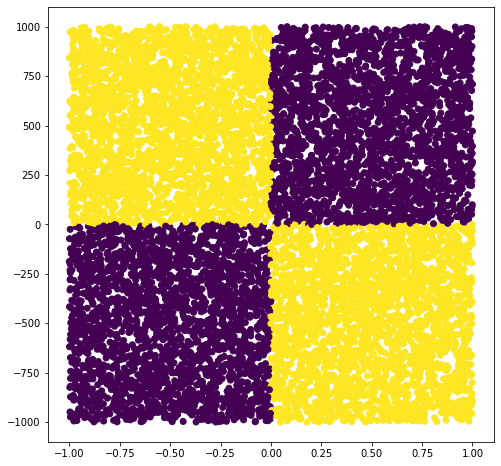

In [82]:
plt.scatter(Xy[:,:,0], Xy[:,:,1], c=ground_truth)

# KNN

In [83]:
knn = sklearn.neighbors.KNeighborsClassifier(20).fit(Xy.reshape(N**2,2), ground_truth.reshape(N**2))
knn_pred = knn.predict(XyGrid.reshape(2,(N*2)**2).T).reshape(N*2,N*2)

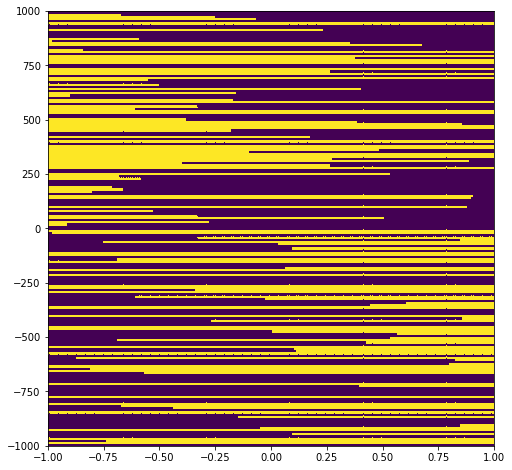

In [125]:
plt.pcolormesh(XyGrid[0], XyGrid[1], knn_pred)

# NB

In [127]:
nb = sklearn.naive_bayes.GaussianNB().fit(Xy.reshape(N**2,2), ground_truth.reshape(N**2))
nb_pred = nb.predict(XyGrid.reshape(2,(N*2)**2).T).reshape(N*2,N*2)

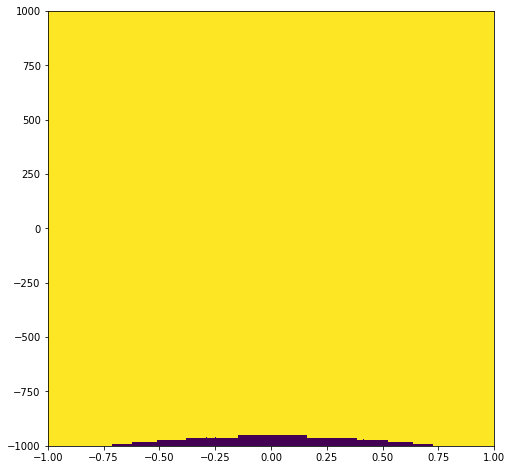

In [128]:
plt.pcolormesh(XyGrid[0], XyGrid[1], nb_pred)